In [1]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers.legacy import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
base_dir = '/Users/sreehari/PycharmProjects/FInal_Project/datasets/Knee'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Metal device set to: Apple M1


2024-05-12 17:53:26.551066: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-12 17:53:26.551194: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [5]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150, 150))

Found 5385 images belonging to 2 classes.
Found 614 images belonging to 2 classes.


In [7]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    verbose=2
)

Epoch 1/30


2024-05-12 17:53:28.279599: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-12 17:53:28.875793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x20x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be

270/270 - 36s - loss: 0.5672 - accuracy: 0.7736 - val_loss: 0.4667 - val_accuracy: 0.7834 - 36s/epoch - 134ms/step
Epoch 2/30


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x14x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x14x1x1xi1>'


270/270 - 30s - loss: 0.4493 - accuracy: 0.8043 - val_loss: 0.3390 - val_accuracy: 0.8746 - 30s/epoch - 110ms/step
Epoch 3/30
270/270 - 31s - loss: 0.3169 - accuracy: 0.8780 - val_loss: 0.2611 - val_accuracy: 0.8958 - 31s/epoch - 114ms/step
Epoch 4/30
270/270 - 30s - loss: 0.2570 - accuracy: 0.9014 - val_loss: 0.2631 - val_accuracy: 0.8958 - 30s/epoch - 113ms/step
Epoch 5/30
270/270 - 29s - loss: 0.2122 - accuracy: 0.9194 - val_loss: 0.2345 - val_accuracy: 0.9202 - 29s/epoch - 106ms/step
Epoch 6/30
270/270 - 26s - loss: 0.1808 - accuracy: 0.9346 - val_loss: 0.1991 - val_accuracy: 0.9381 - 26s/epoch - 98ms/step
Epoch 7/30
270/270 - 28s - loss: 0.1625 - accuracy: 0.9409 - val_loss: 0.2065 - val_accuracy: 0.9235 - 28s/epoch - 105ms/step
Epoch 8/30
270/270 - 29s - loss: 0.1411 - accuracy: 0.9461 - val_loss: 0.2322 - val_accuracy: 0.9137 - 29s/epoch - 106ms/step
Epoch 9/30
270/270 - 28s - loss: 0.1420 - accuracy: 0.9536 - val_loss: 0.1876 - val_accuracy: 0.9397 - 28s/epoch - 103ms/step
Epoc

<Figure size 640x480 with 0 Axes>

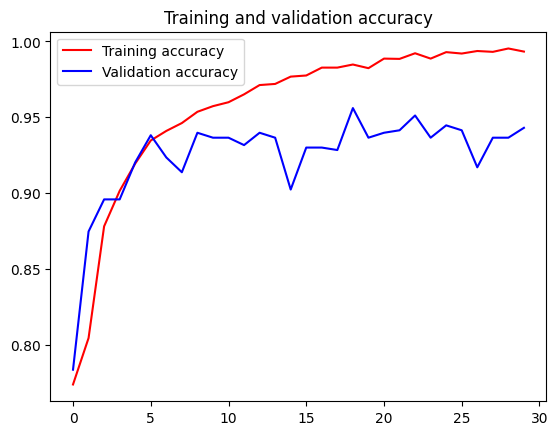

<Figure size 640x480 with 0 Axes>

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [9]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

Found 1209 images belonging to 2 classes.


In [12]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

61/61 [==============================] - 2s 23ms/step - loss: 0.3269 - accuracy: 0.9603
Test Loss: 0.3268944025039673
Test Accuracy: 0.9602977633476257


In [11]:
model.save('arth.h5')